In [1]:
import BudykoSellers
import emulator_utils
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

%load_ext autoreload
%autoreload 2

## Experiment 3 - Cubic Lorenz System

List of experiments:

a) 2xCO2

b) High Emissions

c) Mid. Emissions

d) Overshoot

#### Setup and Run Experiments

In [11]:
# Required variables
alpha = 1./1000.
beta = 8.0/3.0
sigma = 10.

# Time variables
dt = 0.1
t_max = 250
t_vec = np.arange(0, t_max + dt, dt)

r = 10.0 * dt
N = 500

T = 1
omega = 1./T
offset = 50

t_max_init = 20
x0, y0, z0 = emulator_utils.Lorenz_init(t_max_init, dt, N, r, alpha, beta, sigma, omega)
print('Initialized')

scenarios = ['Abrupt','High Emissions','Mid Emissions','Overshoot']

x_snap, y_snap, z_snap, z_mean, z_max, z_std, rho = {}, {}, {}, {}, {}, {}, {}
for i, scen in enumerate(scenarios):
  x_snap[scen], y_snap[scen], z_snap[scen], z_mean[scen], z_max[scen], z_std[scen], rho[scen] = emulator_utils.Lorenz_integrate(t_max, dt, N, r, alpha, beta, sigma, omega, offset, x0, y0, z0, exp=i)

Initialized


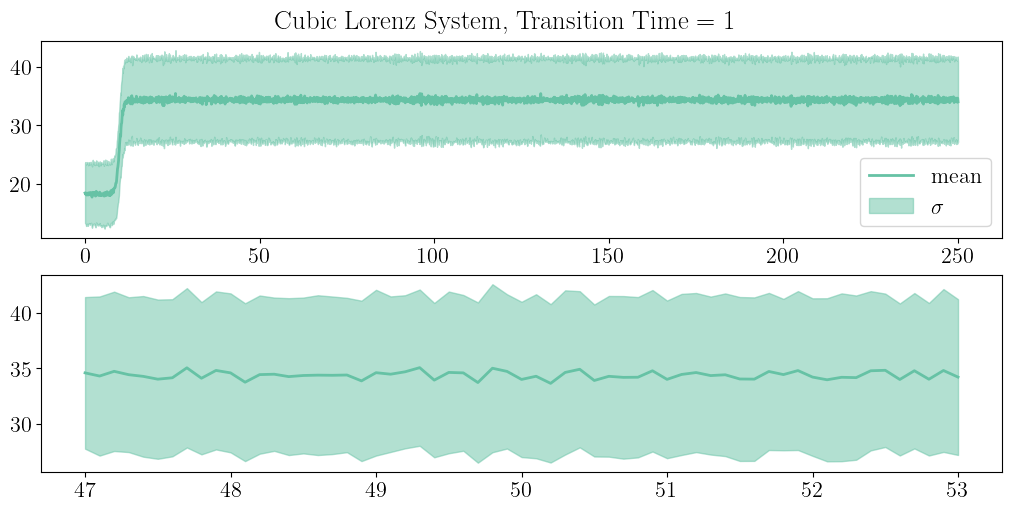

In [14]:
scen = scenarios[0]
emulator_utils.Lorenz_plot(z_mean[scen][0:-1], z_std[scen][0:-1], t_vec, offset, T)

In [73]:
dt = 0.005
t_max = 250
N = 5000
t_vec = np.arange(0, t_max + dt, dt)
R_FDT = emulator_utils.Lorenz_FDT(N, dt, t_max)

In [74]:
R_Z = R_FDT[:,2]
dt = 0.005
t_vec = np.arange(0, t_max + dt, dt)
rho_ab = np.zeros(len(t_vec))

for i, t in enumerate(t_vec):
  rho_ab[i] = emulator_utils.Lorenz_rho(t,exp=3)

In [75]:
#response1 = emulator_utils.emulate_response(rho_ab, R_Z, dt)
response1 = np.convolve(R_Z,rho_ab, mode='full')[:] * dt
#response2 = emulator_utils.emulate_response(rho['Abrupt'], R_Z, dt=0.005)
#print(np.allclose(response1,response2))

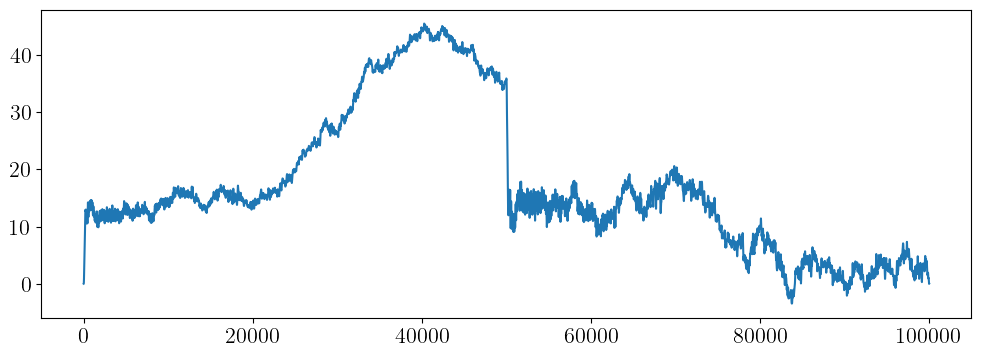

In [76]:
plt.plot(response1)

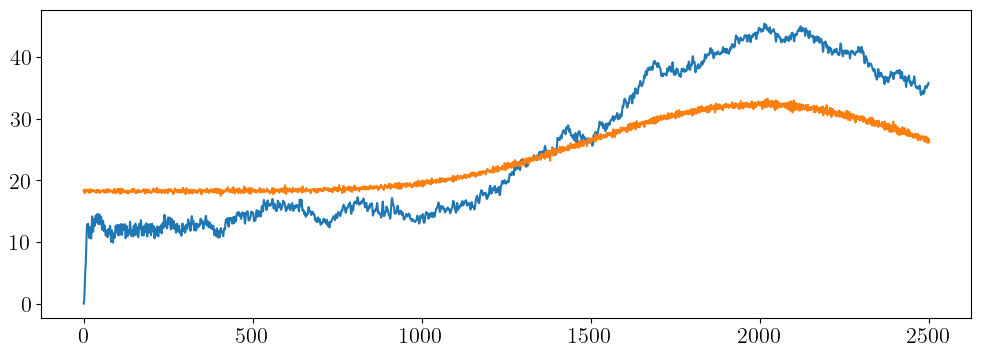

In [77]:
resp_plot = response1[0:50000][::20]
plt.plot(resp_plot)
plt.plot(z_mean['Overshoot'])

### Method 5: DMD

Train: Abrupt - L2 Error
	Test: Abrupt - [12.58032842]
	Test: High Emissions - [30.21013879]
	Test: Mid Emissions - [24.86757863]
	Test: Overshoot - [26.52031551]
Train: High Emissions - L2 Error
	Test: Abrupt - [36.73530674]
	Test: High Emissions - [8.41348699]
	Test: Mid Emissions - [18.62338363]
	Test: Overshoot - [18.47901777]
Train: Mid Emissions - L2 Error
	Test: Abrupt - [23.72539505]
	Test: High Emissions - [17.58815356]
	Test: Mid Emissions - [15.46166753]
	Test: Overshoot - [17.4409929]
Train: Overshoot - L2 Error
	Test: Abrupt - [22.76532507]
	Test: High Emissions - [18.44460389]
	Test: Mid Emissions - [15.97475409]
	Test: Overshoot - [17.97497727]


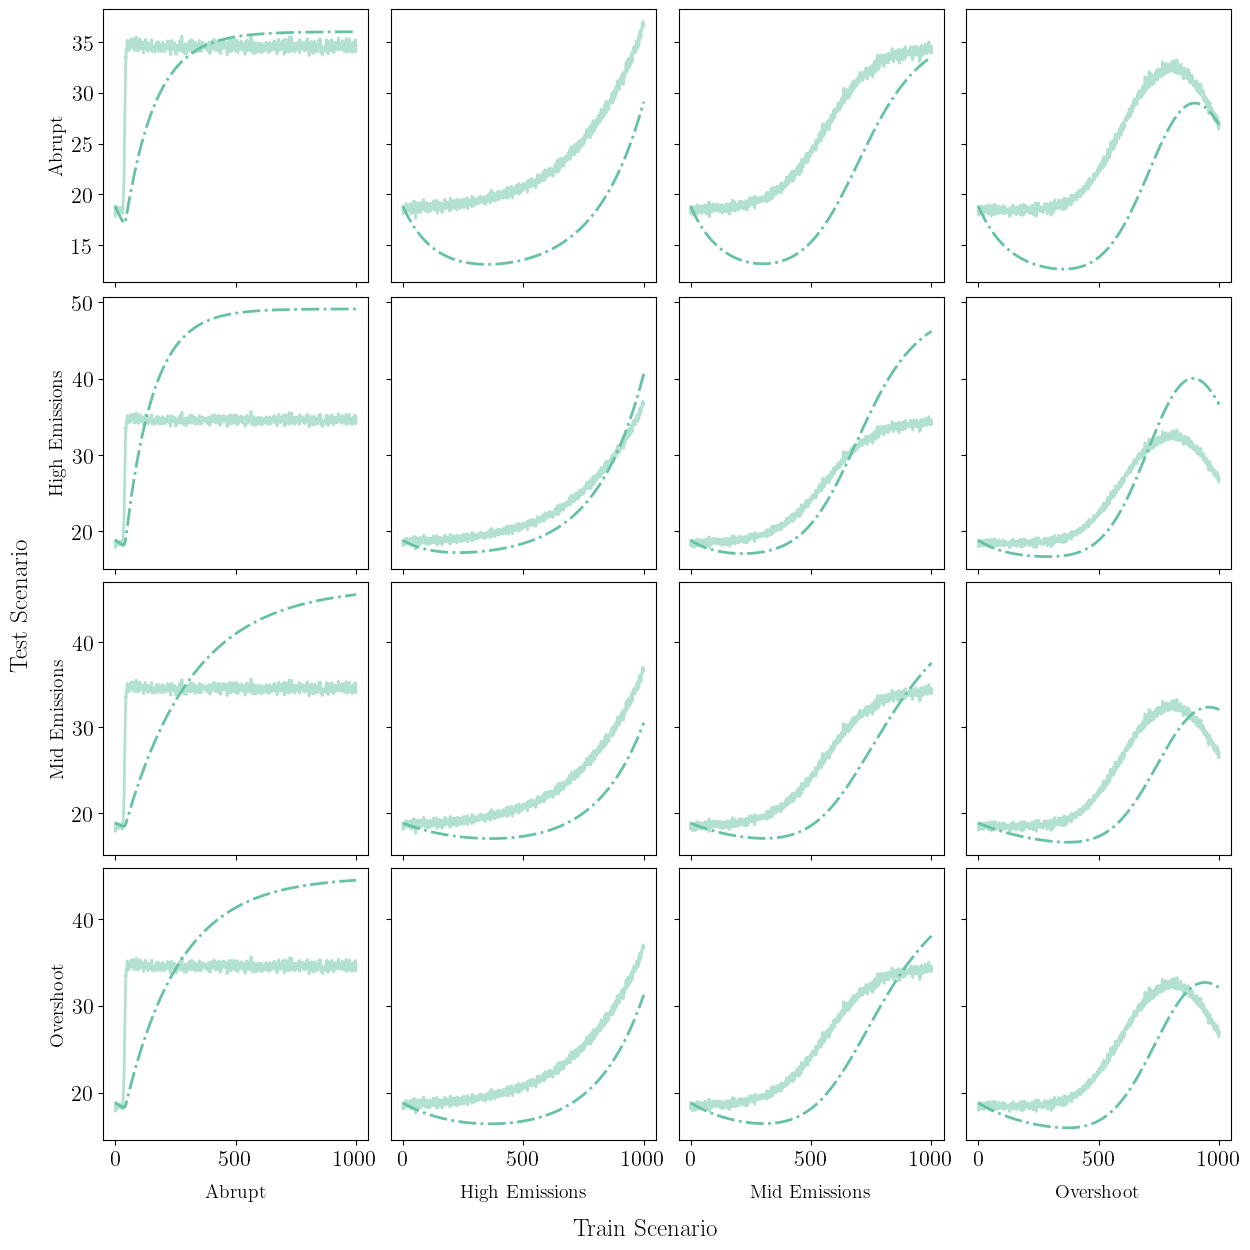

In [36]:
n_steps = len(t_vec)
n_boxes = 1
w0 = np.array([np.mean(z0)])
t_range = np.where(t_vec > 0)[0]
operator_DMD, z_pred_DMD, error_metrics_DMD = emulator_utils.emulate_scenarios('DMD', scenarios=scenarios, outputs=z_mean, forcings=rho, w0=w0, t=t_vec, dt=dt, n_steps=n_steps, n_boxes=n_boxes, t_range=t_range)
emulator_utils.plot_true_pred(z_mean, z_pred_DMD, scenarios)

### Method 6: EDMD

Train: Abrupt - L2 Error
	Test: Abrupt - [2.86374095e+50]
	Test: High Emissions - [3.68548631e+50]
	Test: Mid Emissions - [1.70736938e+50]
	Test: Overshoot - [4.37450252e+50]
Train: High Emissions - L2 Error
	Test: Abrupt - [1.73093185]
	Test: High Emissions - [1.22544195]
	Test: Mid Emissions - [1.17814332]
	Test: Overshoot - [1.15060923]
Train: Mid Emissions - L2 Error
	Test: Abrupt - [1.16112401]
	Test: High Emissions - [1.27922996]
	Test: Mid Emissions - [1.1229176]
	Test: Overshoot - [1.15666555]
Train: Overshoot - L2 Error
	Test: Abrupt - [1.30367427]
	Test: High Emissions - [1.27306379]
	Test: Mid Emissions - [1.12497179]
	Test: Overshoot - [1.1363703]


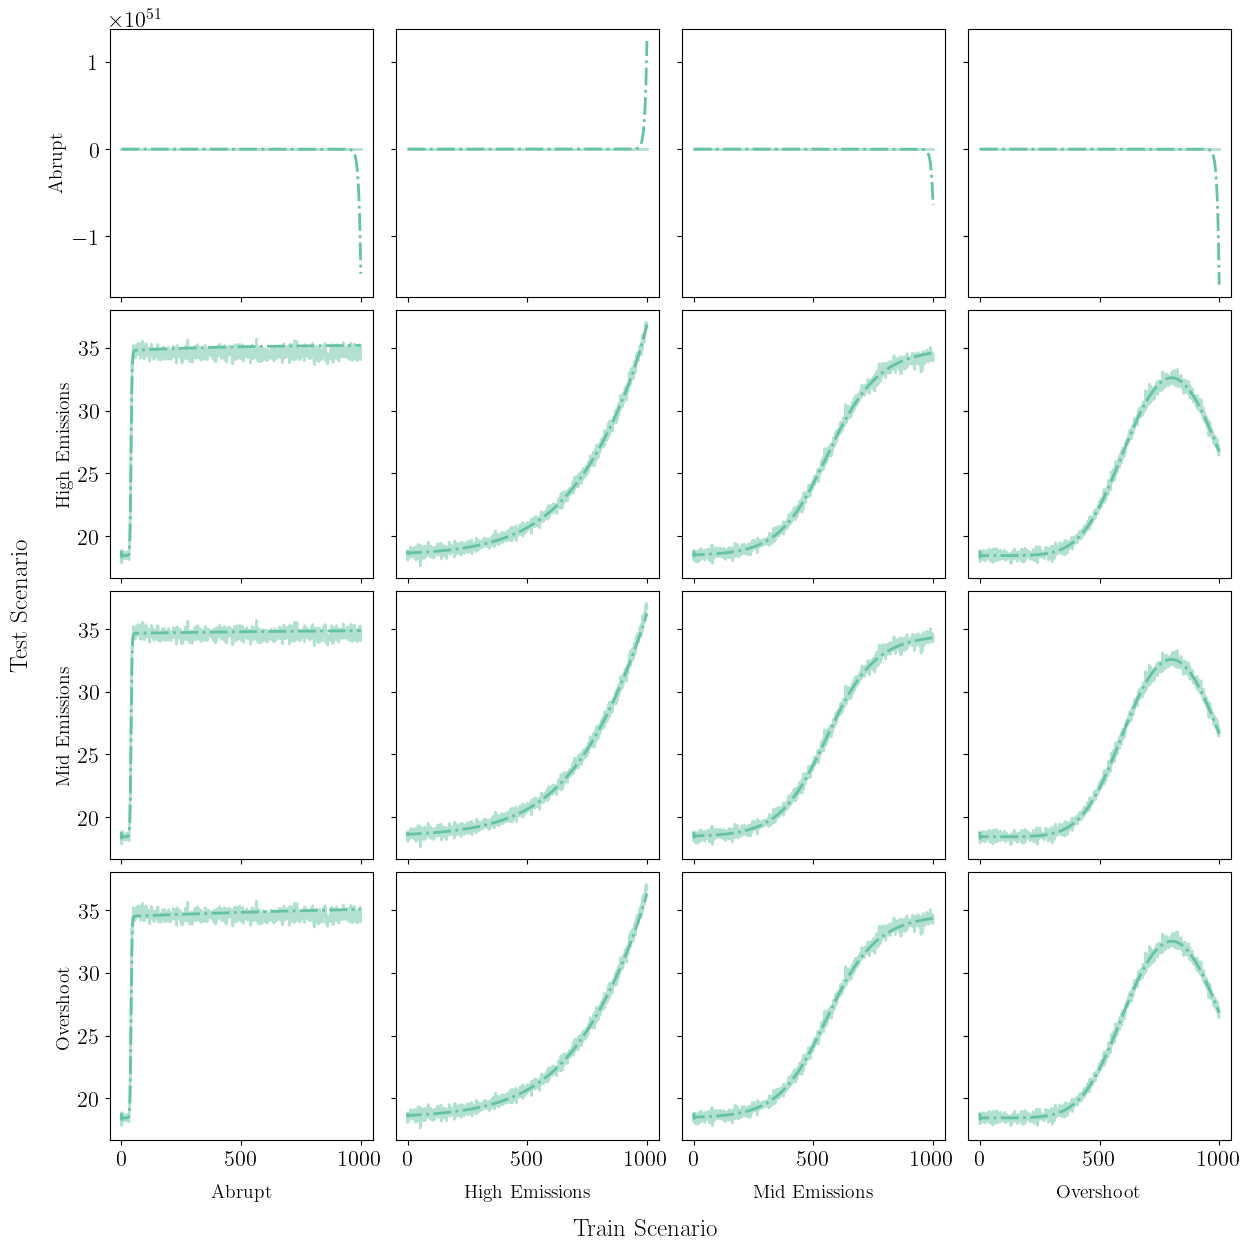

In [37]:
n_steps = len(t_vec)
w0 = np.array([np.mean(z0)])
w_dict = emulator_utils.Vector_Dict(method='hermite', degree=3)
F_dict = emulator_utils.Vector_Dict(method='hermite', degree=3)

t_range = np.where(t_vec > 50)[0]
operator_EDMD, T_pred_EDMD, error_metrics_EDMD = emulator_utils.emulate_scenarios('EDMD', scenarios=scenarios, outputs=z_mean, forcings=rho, w0=w0, t=t_vec, dt=dt,
                                                                n_steps=n_steps, n_boxes=n_boxes, w_dict=w_dict, F_dict=F_dict)
emulator_utils.plot_true_pred(z_mean, T_pred_EDMD, scenarios)

### Method X: Deconvolution

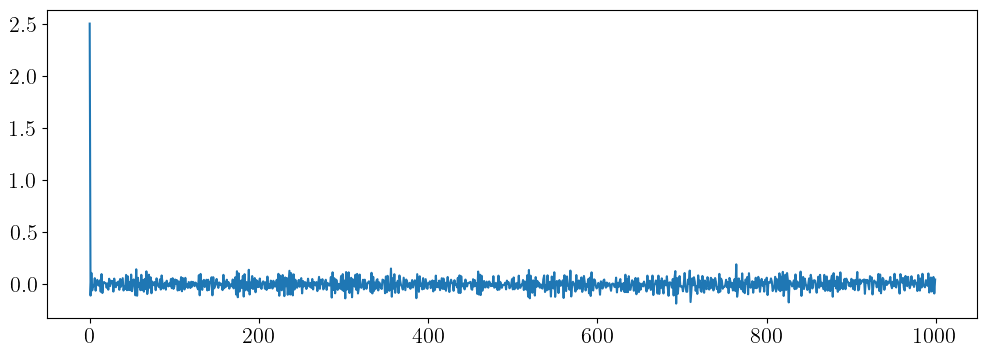

In [16]:
plt.plot(operator_deconvolve['Overshoot'].T[0:1000])

Train: Abrupt - L2 Error


/Users/chriswomack/anaconda3/envs/research/lib/python3.13/site-packages/scipy/optimize/_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


	Test: Abrupt - [3.15479668]
	Test: High Emissions - [27.06623103]
	Test: Mid Emissions - [20.765252]
	Test: Overshoot - [23.54268662]
Train: High Emissions - L2 Error
	Test: Abrupt - [50.52413553]
	Test: High Emissions - [0.00140757]
	Test: Mid Emissions - [20.87605342]
	Test: Overshoot - [22.54397342]
Train: Mid Emissions - L2 Error
	Test: Abrupt - [56.51924132]
	Test: High Emissions - [23.08811729]
	Test: Mid Emissions - [0.06082848]
	Test: Overshoot - [11.96303836]
Train: Overshoot - L2 Error
	Test: Abrupt - [53.77209037]
	Test: High Emissions - [25.15996311]
	Test: Mid Emissions - [11.68104705]
	Test: Overshoot - [0.00589801]


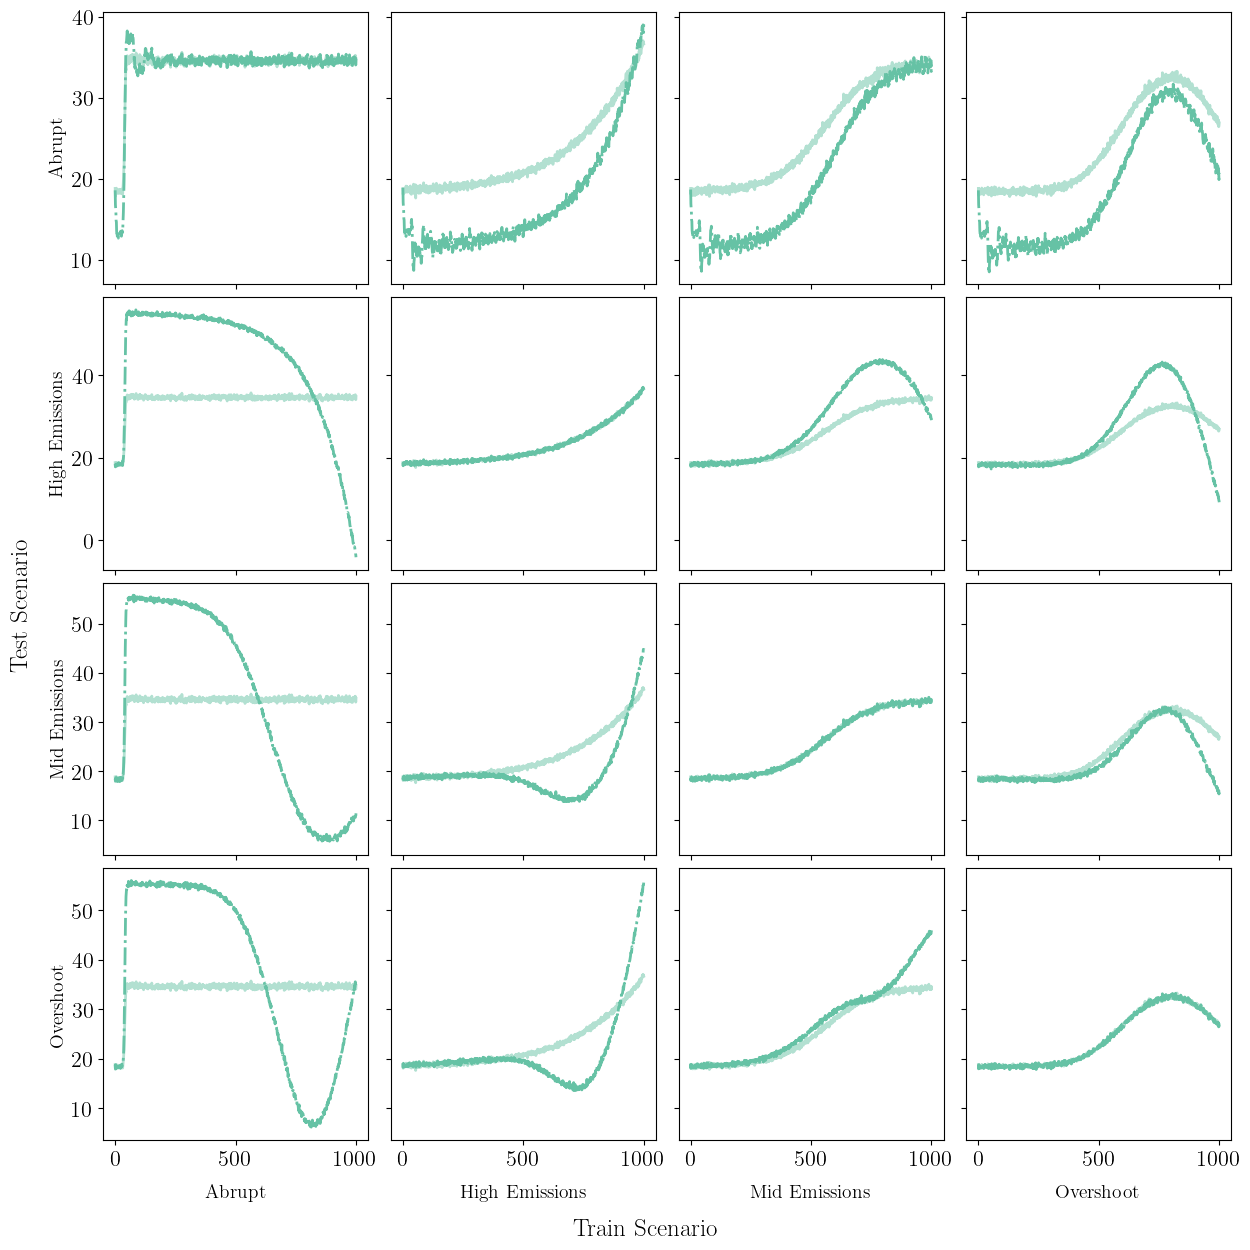

In [12]:
operator_deconvolve, z_pred_deconvolve, error_metrics_deconvolve = emulator_utils.emulate_scenarios('deconvolve', scenarios=scenarios, outputs=z_mean, forcings=rho, dt=dt, regularize=True)
emulator_utils.plot_true_pred(z_mean, z_pred_deconvolve, scenarios)

### Method X: Exponential Fit

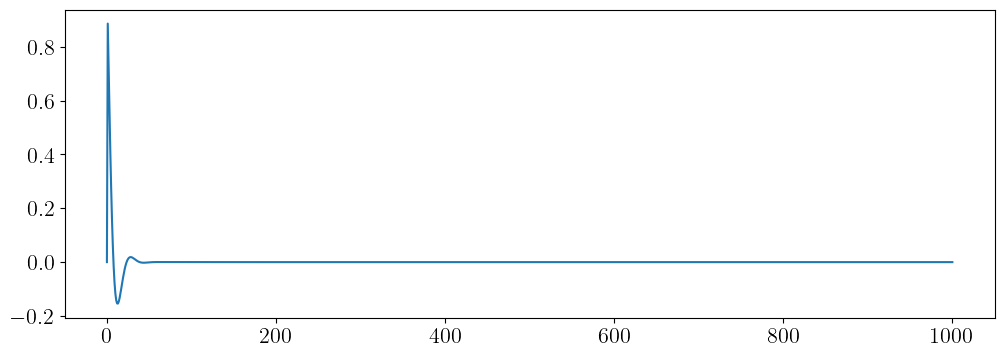

In [22]:
plt.plot(operator_fit['Overshoot'].T)

Train: Abrupt - L2 Error


/Users/chriswomack/anaconda3/envs/research/lib/python3.13/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex64 to dtype=float32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/Users/chriswomack/anaconda3/envs/research/lib/python3.13/site-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)
/Users/chriswomack/anaconda3/envs/research/lib/python3.13/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex64 to dtype=float32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/Users/chriswomack/anaconda3/envs/research/lib/python3.13/site-packages/jax/_src/ops/scatter.py

Step 0, cost=97.662682
Step 10, cost=124.402328
Step 20, cost=103.137177
Step 30, cost=67.575729
Step 40, cost=60.208210
Step 50, cost=52.120632
Step 60, cost=50.932842
Step 70, cost=48.917229
Step 80, cost=48.274750
Step 90, cost=47.970650
[-0.5589675  -0.44612452 -0.20018893]


/Users/chriswomack/Documents/PhD/Project 1/emulator_utils.py:695: ComplexWarning: Casting complex values to real discards the imaginary part
  G_opt[:,i] = 1/alpha*jnp.exp(1/alpha*(lam + 1j*omega)*n)


	Test: Abrupt - [4.45399248]
	Test: High Emissions - [27.41061852]
	Test: Mid Emissions - [21.14878853]
	Test: Overshoot - [23.78009352]
Train: High Emissions - L2 Error


/Users/chriswomack/anaconda3/envs/research/lib/python3.13/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex64 to dtype=float32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/Users/chriswomack/anaconda3/envs/research/lib/python3.13/site-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)


Step 0, cost=217.066071
Step 10, cost=148.309723
Step 20, cost=143.817352
Step 30, cost=132.036118
Step 40, cost=128.905289
Step 50, cost=128.299271
Step 60, cost=127.676834
Step 70, cost=127.139450
Step 80, cost=126.774429
Step 90, cost=126.525597
[-0.28180048 -0.2720364  -0.25600126]


/Users/chriswomack/Documents/PhD/Project 1/emulator_utils.py:695: ComplexWarning: Casting complex values to real discards the imaginary part
  G_opt[:,i] = 1/alpha*jnp.exp(1/alpha*(lam + 1j*omega)*n)


	Test: Abrupt - [26.92913067]
	Test: High Emissions - [17.46919775]
	Test: Mid Emissions - [19.73521209]
	Test: Overshoot - [16.18041239]
Train: Mid Emissions - L2 Error


/Users/chriswomack/anaconda3/envs/research/lib/python3.13/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex64 to dtype=float32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/Users/chriswomack/anaconda3/envs/research/lib/python3.13/site-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)


Step 0, cost=190.088013
Step 10, cost=136.570282
Step 20, cost=136.340073
Step 30, cost=136.012344
Step 40, cost=135.309738
Step 50, cost=135.151169
Step 60, cost=135.153717
Step 70, cost=134.958008
Step 80, cost=134.820023
Step 90, cost=134.772934
[ 0.03847209 -0.7300609  -0.22797373]


/Users/chriswomack/Documents/PhD/Project 1/emulator_utils.py:695: ComplexWarning: Casting complex values to real discards the imaginary part
  G_opt[:,i] = 1/alpha*jnp.exp(1/alpha*(lam + 1j*omega)*n)


	Test: Abrupt - [15.53007337]
	Test: High Emissions - [20.25027448]
	Test: Mid Emissions - [16.68115367]
	Test: Overshoot - [16.73405541]
Train: Overshoot - L2 Error


/Users/chriswomack/anaconda3/envs/research/lib/python3.13/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex64 to dtype=float32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/Users/chriswomack/anaconda3/envs/research/lib/python3.13/site-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)


Step 0, cost=204.669922
Step 10, cost=122.145142
Step 20, cost=123.789574
Step 30, cost=122.131172
Step 40, cost=120.429268
Step 50, cost=119.658371
Step 60, cost=119.472595
Step 70, cost=119.407646
Step 80, cost=119.281776
Step 90, cost=119.204254
[-0.03616191 -0.6431856  -0.2466597 ]


/Users/chriswomack/Documents/PhD/Project 1/emulator_utils.py:695: ComplexWarning: Casting complex values to real discards the imaginary part
  G_opt[:,i] = 1/alpha*jnp.exp(1/alpha*(lam + 1j*omega)*n)


	Test: Abrupt - [22.04236663]
	Test: High Emissions - [18.27533188]
	Test: Mid Emissions - [17.74052324]
	Test: Overshoot - [15.58881934]


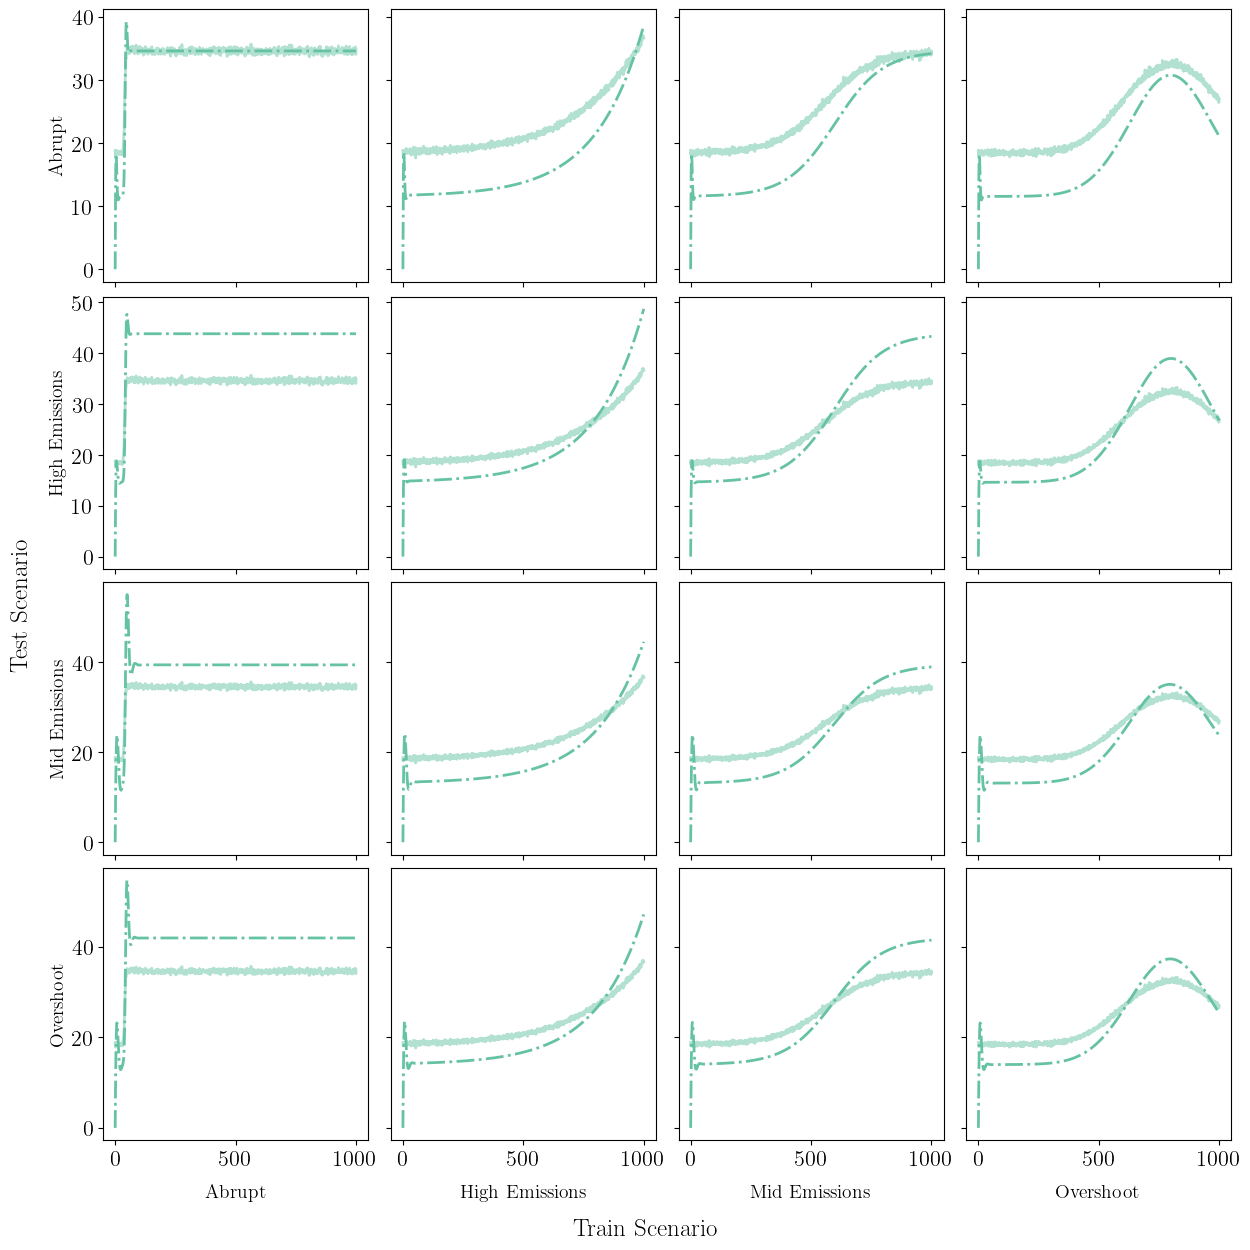

In [17]:
n_boxes = 1
operator_fit, T_pred_fit, error_metrics_fit = emulator_utils.emulate_scenarios('fit_complex', scenarios=scenarios, outputs=z_mean, forcings=rho, t=t_vec, dt=dt, n_boxes=n_boxes, n_modes=1)
emulator_utils.plot_true_pred(z_mean, T_pred_fit, scenarios)

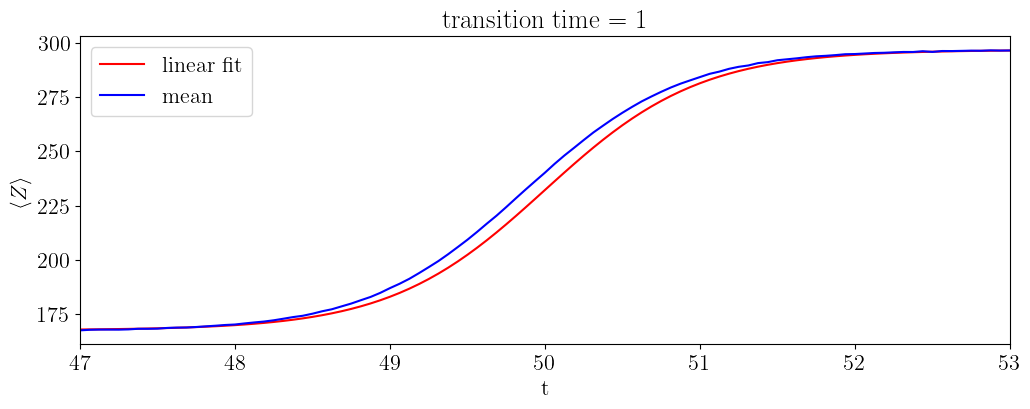

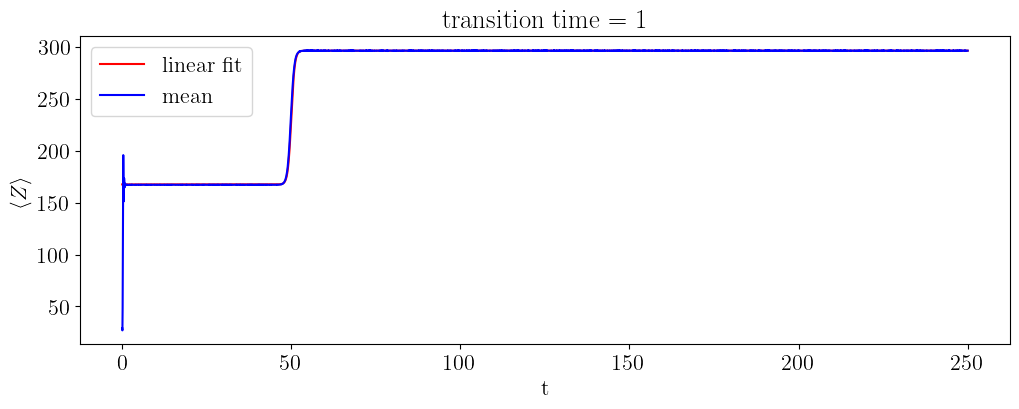

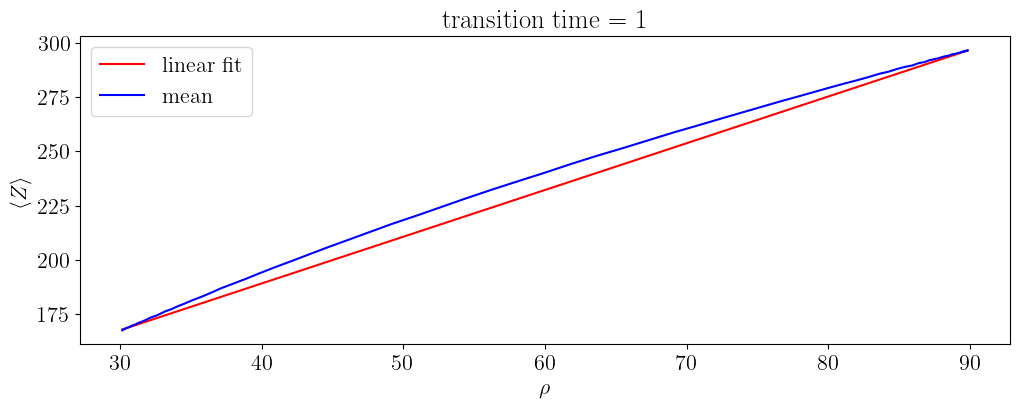

In [38]:
# 1) Create time array and compute rhos
rhos = emulator_utils.Lorenz_rho(t_vec, omega)

# 2) Linear fit for t >= 200
ind = np.where(t_vec >= 25)
p = np.polyfit(rhos[ind], x_mean['2xCO2'][ind], 1)   # slope & intercept
xfit = np.polyval(p, rhos)             # Evaluate the fit over all time

# 5) Restrict to region around tmax/2 ± 3*period
tmid = t_max/2
ind2 = np.where((t_vec >= 50 - 3*T) & (t_vec <= 50 + 3*T))[0]

# 6) Plot vs time
plt.figure()
plt.plot(t_vec[ind2], xfit[ind2], 'r', label='linear fit')
plt.plot(t_vec[ind2], x_mean['2xCO2'][ind2],   'b', label='mean')
plt.title(f"transition time = {T}")
plt.xlabel("t")
plt.ylabel(r"$\langle Z\rangle$")
plt.legend(loc='upper left')
plt.xlim([t_vec[ind2[0]], t_vec[ind2[-1]]])

plt.figure()
plt.plot(t_vec, xfit, 'r', label='linear fit')
plt.plot(t_vec, x_mean['2xCO2'],   'b', label='mean')
plt.title(f"transition time = {T}")
plt.xlabel("t")
plt.ylabel(r"$\langle Z\rangle$")
plt.legend(loc='upper left')

# 7) Plot vs rho
plt.figure()
plt.plot(rhos[ind2], xfit[ind2], 'r', label='linear fit')
plt.plot(rhos[ind2], x_mean['2xCO2'][ind2],   'b', label='mean')
plt.title(f"transition time = {T}")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\langle Z\rangle$")
plt.legend(loc='upper left')
#plt.savefig(f"cublort-fit-{period}-rho.png")

made init


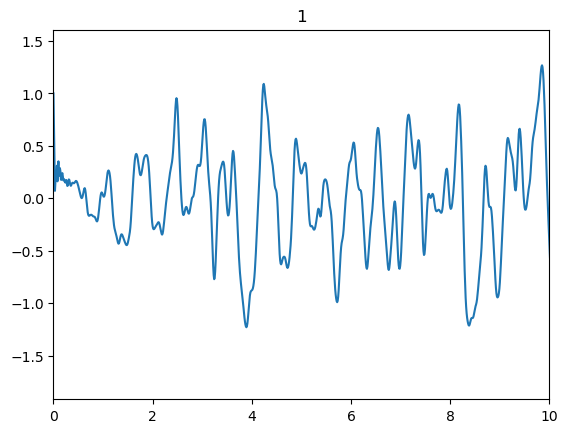

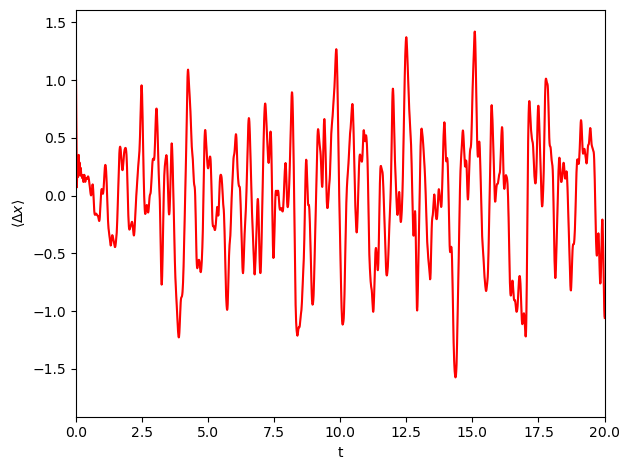

In [1]:
"""
Lorenz-type ensemble experiment
–––––––––––––––––––––––––––––––
• Initial ensemble spun-up for 1 000 time-units (dt = 1/64) with additive
  Gaussian noise, matching the Octave code you provided.
• Main experiment: 450 repeats, each 100 time-units long (dt = 0.01),
  again with common noise and using SciPy’s RK45 at every sub-step.

Dependencies: numpy, scipy, matplotlib
"""

from functools import partial
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# ───────────────────────── 1.  Lorenz-like RHS ───────────────────────── #
def lorenz_rhs(t, y, beta, sigma, rho, alpha):
    """
    Vectorised RHS for an ensemble of size N.
    `y` is 1-D, shape (3 N,).  Returns same shape.
    """
    N = y.size // 3
    x = y[:N]
    yv = y[N:2*N]
    z = y[2*N:]

    dx = -beta * x + yv * z
    dy = -sigma * yv + sigma * z
    dz = -(x + alpha * x**3) * yv + rho * yv - z
    return np.concatenate([dx, dy, dz])


def rk45_step(t0, y0, dt, rhs, *rhs_args):
    """
    Advance one fixed interval `dt` using SciPy's adaptive RK45.
    Returns y_next, t_next (= t0+dt).
    """
    sol = solve_ivp(rhs, (t0, t0 + dt), y0,
                    args=rhs_args, method='RK45',
                    t_eval=[t0 + dt], vectorized=False)
    return sol.y[:, -1], sol.t[-1]


# ─────────────────────── 2.  Spin-up: initial ensemble ────────────────── #
def generate_initial_ensemble(N=100, dt=1/64, tmax=1_000,
                              beta=8/3, sigma=10,
                              rho=30, alpha=1/1_000,
                              noise_coeff=10.0):
    """
    Pure Python re-write of the Octave spin-up block.
    Returns `xv` with shape (N, 3) ready for the main experiment.
    """
    # initial conditions
    x = np.full(N, rho - 1.0)
    y = np.random.uniform(-1.0, 1.0, N)
    z = np.random.uniform(-1.0, 1.0, N)
    Y = np.column_stack([x, y, z]).ravel()          # flatten to (3 N,)

    rhs = partial(lorenz_rhs, beta=beta, sigma=sigma, rho=rho, alpha=alpha)
    r = noise_coeff * dt
    t = 0.0

    while t < tmax - 1e-12:
        Y, t = rk45_step(t, Y, dt, rhs)
        Y += r * np.random.randn(*Y.shape)          # additive noise

    return Y.reshape(N, 3)


# ───────────────────────── 3.  Main experiment loop ───────────────────── #
def run_experiment(xv, loops=1, dt=0.01, tmax=100.0,
                   beta=8/3, sigma=10, rho=28, alpha=0.10,
                   r=1e-4):
    """
    Replicates the Octave analysis but with SciPy’s RK45.
    Returns the stack of Δx time-series (shape (loops, nt)) and the time grid.
    """
    rhs = partial(lorenz_rhs, beta=beta, sigma=sigma, rho=rho, alpha=alpha)
    N = xv.shape[0]
    nt = int(tmax / dt) + 1
    ts = np.linspace(0.0, tmax, nt)

    dxs_store = []

    for cnt in range(1, loops + 1):
        xv_run  = xv.copy()
        xvp_run = xv_run + np.column_stack((np.ones(N), np.zeros((N, 2))))

        xs  = np.empty(nt)
        xsp = np.empty(nt)
        xs[0]  = xv_run[:, 0].mean()
        xsp[0] = xvp_run[:, 0].mean()

        Y   = xv_run.ravel()
        Yp  = xvp_run.ravel()
        t   = 0.0
        j   = 1
        while t < tmax - 1e-12:
            Y,  t = rk45_step(t,  Y,  dt, rhs)
            Yp, t = rk45_step(t - dt, Yp, dt, rhs)  # keep stride aligned

            noise = r * np.random.randn(*Y.shape)
            Y  += noise
            Yp += noise

            xs[j]  = Y.reshape(N, 3)[:, 0].mean()
            xsp[j] = Yp.reshape(N, 3)[:, 0].mean()
            j += 1

        dxs_store.append(xsp - xs)

        # live preview (same spirit as the Octave code)
        plt.clf()
        if cnt == 1:
            plt.plot(ts, dxs_store[-1])
        else:
            plt.plot(ts, np.mean(dxs_store, axis=0))
        plt.title(f"{cnt}")
        plt.xlim(0, 10)
        plt.pause(0.01)

    return np.vstack(dxs_store), ts


# ───────────────────────────── 4.  Run everything ─────────────────────── #
if __name__ == "__main__":
    # 4.1  Spin-up ensemble
    xv_init = generate_initial_ensemble()
    print('made init')

    # 4.2  Main 450-loop experiment
    dxs, ts = run_experiment(xv_init)

    # 4.3  Final plot (all grey, mean in red) – matches Octave
    plt.figure()
    for row in dxs:
        plt.plot(ts, row, lw=1, color=[0.8, 0.8, 0.8])
    plt.plot(ts, dxs.mean(axis=0), "r", lw=1.5)
    plt.xlim(0, 20)
    plt.xlabel("t")
    plt.ylabel(r"$\langle \Delta x \rangle$")
    plt.tight_layout()
    plt.show()
